In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [256]:
cmap = plt.get_cmap('tab20')

gamma_selection_colors = {
    'IPR Bootstrap-VAR (U)': cmap(0),
    'IPR Bootstrap-VAR (V)': cmap(1),

    'IPR Bootstrap-MSE (U)': cmap(2),
    'IPR Bootstrap-MSE (V)': cmap(3),

    'IPR Grid-EST.VAR (U)': cmap(4),
    'IPR Grid-EST.VAR (V)': cmap(5),

    'IPR 1/p (U)': cmap(6),
    'IPR 1/p (V)': cmap(7),
    'IPR 1/p (U, V)': cmap(6),

    'NRM Bootstrap-VAR (U)': cmap(8),
    'NRM Bootstrap-VAR (V)': cmap(9),

    'NRM Bootstrap-MSE (U)': cmap(10),
    'NRM Bootstrap-MSE (V)': cmap(11),

    'NRM Grid-EST.VAR (U)': cmap(12),
    'NRM Grid-EST.VAR (V)': cmap(13),

    'NRM 1/p (U)': cmap(14),
    'NRM 1/p (V)': cmap(15),
    'NRM 1/p (U, V)': cmap(14),

    'IPR 1/p (V, Laplace)': cmap(16)
}

gamma_selection_names = {
    'ipr_bootstrap_var_U_rbf' : 'IPR Bootstrap-VAR (U)',
    'ipr_bootstrap_var_V_rbf' : 'IPR Bootstrap-VAR (V)',

    'ipr_bootstrap_mse_U_rbf' : 'IPR Bootstrap-MSE (U)',
    'ipr_bootstrap_mse_V_rbf' : 'IPR Bootstrap-MSE (V)',

    'ipr_grid_U_rbf' : 'IPR Grid-EST.VAR (U)',
    'ipr_grid_V_rbf' : 'IPR Grid-EST.VAR (V)',

    'ipr_one_over_p_U_rbf' : 'IPR 1/p (U)',
    'ipr_one_over_p_V_rbf' : 'IPR 1/p (V)',
    'ipr_one_over_p_UV_rbf' : 'IPR 1/p (U, V)',

    'nrm_bootstrap_var_U_rbf' : 'NRM Bootstrap-VAR (U)',
    'nrm_bootstrap_var_V_rbf' : 'NRM Bootstrap-VAR (V)',

    'nrm_bootstrap_mse_U_rbf' : 'NRM Bootstrap-MSE (U)',
    'nrm_bootstrap_mse_V_rbf' : 'NRM Bootstrap-MSE (V)',

    'nrm_grid_U_rbf' : 'NRM Grid-EST.VAR (U)',
    'nrm_grid_V_rbf' : 'NRM Grid-EST.VAR (V)',

    'nrm_one_over_p_U_rbf' : 'NRM 1/p (U)',
    'nrm_one_over_p_V_rbf' : 'NRM 1/p (V)',
    'nrm_one_over_p_UV_rbf': 'NRM 1/p (U, V)',
    
    'ipr_one_over_p_V_laplacian' : 'IPR 1/p (V, Laplace)',
}

In [96]:
def filter_df(df, filters):
    mask = pd.Series(True, index=df.index)
    for col, vals in filters.items():
        mask &= df[col].isin(vals)
    return df[mask]

In [406]:
df_estimators_sim_list = [
    pd.read_csv('results_grid/df_estimators_sim_par_4_025.csv'),
    pd.read_csv('results_grid/df_estimators_sim_par_4_075.csv'),
    pd.read_csv('results_grid/df_estimators_sim_par_4-p-20_025.csv'),
    pd.read_csv('results_grid/df_estimators_sim_par_4-Cauchy_025.csv'),
    pd.read_csv('results_grid/df_estimators_sim_par_4-p-20_075.csv'),
    pd.read_csv('results_grid/df_estimators_sim_par_4-Cauchy_075.csv')
]
df_gamma_selection_list = [
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4_025.csv'),
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4_075.csv'),
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4-p-20_025.csv'),
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4-Cauchy_025.csv'),
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4-p-20_075.csv'),
    pd.read_csv('results_grid/df_gamma_selection_sim_par_4-Cauchy_075.csv')
]
df_estimators_sim_list=pd.concat(df_estimators_sim_list)
df_gamma_selection_list=pd.concat(df_gamma_selection_list)

In [ ]:
# weird gamma values (?)
df_estimators_sim_list['gamma'].value_counts()[(df_estimators_sim_list['gamma'].value_counts()==2)]
df_estimators_sim_list = df_estimators_sim_list[~((df_estimators_sim_list['gamma'] - 0.000891)**2 < 1e-13)]
df_estimators_sim_list = df_estimators_sim_list[~((df_estimators_sim_list['gamma'] - 0.000030)**2 < 1e-13)]
df_estimators_sim_list = df_estimators_sim_list[~((df_estimators_sim_list['gamma'] - 0.026607)**2 < 1e-13)]
df_estimators_sim_list = df_estimators_sim_list[~((df_estimators_sim_list['gamma'] - 0.794328)**2 < 1e-13)]

In [140]:
df = pd.concat([
    pd.read_csv('results/results_standard_mse_new.csv', index_col=0),
    pd.read_csv('results/results_dimension_mse_new.csv', index_col=0),
    pd.read_csv('results/results_heavy_tail_mse_new.csv', index_col=0)
])
sim_params_colnames = ['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target', 
                       'gamma_selection_name', 'estimator', 'type', 'kernel',
                        'x', 'x_name', 'p', 'distributions', 'method_name']
values_colnames = ['pi', 'var_n', 'var', 'gamma', 'MSE', 'time', 'count_sim']
df = df.drop_duplicates(sim_params_colnames, keep='last')

In [254]:
df_all = pd.concat([
    pd.read_csv('results/results_standard_all_new.csv', index_col=0),
    pd.read_csv('results/results_dimension_all_new.csv', index_col=0),
    pd.read_csv('results/results_heavy_tail_all_new.csv', index_col=0)
])
sim_params_colnames = ['sim_scenario', 'n_plus', 'n_minus', 'n_target', 'pi_target', 
                       'gamma_selection_name', 'estimator', 'type', 'kernel',
                        'x', 'x_name', 'p', 'distributions', 'method_name']
values_colnames = ['pi', 'var_n', 'var', 'gamma', 'MSE', 'time', 'count_sim']
df_all = df_all.drop_duplicates(sim_params_colnames+['seed'], keep='last')
df_all['CI_L'] = df_all['pi'] - 1.96*np.sqrt(df_all['var_n'])
df_all['CI_U'] = df_all['pi'] + 1.96*np.sqrt(df_all['var_n'])
df_all = df_all[~df_all['seed'].isna()]

In [409]:
def plot_scores_and_boxplots_n(df_estimators_sim, df_gamma_selection, 
                              pi_target=0.25, kernel='rbf',
                              y_lim_list=[[[None, None],[None, None],[None, None]], [[None, None],[None, None],[None, None]]]):
    
    p_seq = [5,5,5]
    dist_seq = ['Gauss','Gauss','Gauss']

    df_estimators_sim.loc[:,'MSE'] = (df_estimators_sim['pi'] - df_estimators_sim['pi_target'])**2
    df_gamma_selection = df_gamma_selection[df_gamma_selection['gamma_selection_name'].isin(['grid', 'bootstrap_var', 'bootstrap_mse'])]

    fig, axes = plt.subplots(4, 3, sharex="col", figsize=(20, 10), height_ratios=[1.35, 1, 1.35, 1])
    fig.suptitle("Comparison of estimators and gamma selection methods"+' (pi_target = '+str(pi_target)+")", fontsize=20, fontweight='bold')
    for j, estimator in enumerate(['ipr', 'nrm']):
        filter_column_0 = {
            'sim_scenario': ['sim_par_4'],
            'n_plus': [50],
            'pi_target': [pi_target],
            'estimator': [estimator],
            'kernel': [kernel],
        }

        filter_column_1 = {
            'sim_scenario': ['sim_par_4'],
            'n_plus': [150],
            'pi_target': [pi_target],
            'estimator': [estimator],
            'kernel': [kernel],
        }

        filter_column_2 = {
            'sim_scenario': ['sim_par_4'],
            'n_plus': [250],
            'pi_target': [pi_target],
            'estimator': [estimator],
            'kernel': [kernel],
        }
        filter_columns = [filter_column_0, filter_column_1, filter_column_2] 
        
        for i in range(3):
            
            df_estimators_sim_tmp = filter_df(df_estimators_sim, filter_columns[i]).copy()
            df_gamma_selection_tmp = filter_df(df_gamma_selection, filter_columns[i]).copy()

            gamma_seq = np.sort(df_estimators_sim_tmp['gamma'].unique().tolist())
            
            df_tmp_1 = df_estimators_sim_tmp[['gamma', 'type', 'MSE']].groupby(['gamma', 'type']).aggregate('mean').reset_index()
            df_tmp_2 = df_estimators_sim_tmp[['gamma', 'type', 'pi']].groupby(['gamma', 'type']).aggregate(var_emp=('pi', 'var')).reset_index()
            df_tmp_3 = df_estimators_sim_tmp[['gamma', 'type', 'var_n']].groupby(['gamma', 'type']).aggregate(
                var_as_mean=('var_n', 'mean'),
                var_as_ql=('var_n', lambda x: x.quantile(0.05)),
                var_as_qu=('var_n', lambda x: x.quantile(0.95))
            ).reset_index()
            if kernel == 'rbf':
                df_tmp_4 = df_estimators_sim_tmp[['gamma', 'type', 'var_rbf']].groupby(['gamma', 'type']).aggregate(var_as_rbf=('var_rbf', 'mean')).reset_index()
                dfs_tmp = [df_tmp_1, df_tmp_2, df_tmp_3, df_tmp_4]
            else:
                dfs_tmp = [df_tmp_1, df_tmp_2, df_tmp_3]
            join_cols = ['gamma', 'type']
            df_first_plot = reduce(lambda left, right: pd.merge(left, right, on=join_cols, how='inner'), dfs_tmp)


            df_gamma_selection_tmp.loc[:,'gamma_selection_U_V'] = df_gamma_selection_tmp['estimator'] + '_' \
                + df_gamma_selection_tmp['gamma_selection_name'] + '_' + df_gamma_selection_tmp['type'] \
                    + '_' + df_gamma_selection_tmp['kernel']
            new = len(df_gamma_selection_tmp)
            df_gamma_selection_tmp.loc[new] = df_gamma_selection_tmp.shape[1]*[np.nan]
            df_gamma_selection_tmp.loc[new+1] = df_gamma_selection_tmp.shape[1]*[np.nan]
            if j ==0:
                df_gamma_selection_tmp.loc[new, 'gamma_selection_U_V'] = 'ipr_one_over_p_UV_rbf'
                df_gamma_selection_tmp.loc[new, 'gamma_optimal'] = 1/p_seq[i]
            if j==1:
                df_gamma_selection_tmp.loc[new+1, 'gamma_selection_U_V'] = 'nrm_one_over_p_UV_rbf'
                df_gamma_selection_tmp.loc[new+1, 'gamma_optimal'] = 1/p_seq[i]
            
            df_second_plot = df_gamma_selection_tmp
            df_second_plot['gamma_selection_U_V'] = df_second_plot['gamma_selection_U_V'].map(gamma_selection_names)
            hue_order = [key for key in gamma_selection_colors.keys() if key in df_second_plot['gamma_selection_U_V'].unique()]

            df_first_plot_U = df_first_plot[df_first_plot['type'] == 'U']
            df_first_plot_V = df_first_plot[df_first_plot['type'] == 'V']
            axes[0+2*j, i].plot(df_first_plot_U['gamma'], df_first_plot_U['var_emp'], label='Empirical var. (U)', color=gamma_selection_colors[gamma_selection_names[estimator+'_bootstrap_var_U_rbf']])
            axes[0+2*j, i].plot(df_first_plot_V['gamma'], df_first_plot_V['var_emp'], label='Empirical var. (V)', color=gamma_selection_colors[gamma_selection_names[estimator+'_bootstrap_var_U_rbf']], linestyle='dashed')
            axes[0+2*j, i].plot(df_first_plot_U['gamma'], df_first_plot_U['MSE'], label='MSE (U)', color=gamma_selection_colors[gamma_selection_names[estimator+'_bootstrap_mse_U_rbf']])
            axes[0+2*j, i].plot(df_first_plot_V['gamma'], df_first_plot_V['MSE'], label='MSE (V)', color=gamma_selection_colors[gamma_selection_names[estimator+'_bootstrap_mse_U_rbf']], linestyle='dashed')
            axes[0+2*j, i].fill_between(df_first_plot_U['gamma'], df_first_plot_U['var_as_ql'], df_first_plot_U['var_as_qu'], label='Est. asymptotic var. 90% (U)', 
                                    color=gamma_selection_colors[gamma_selection_names[estimator+'_grid_U_rbf']], alpha=0.05)
            axes[0+2*j, i].fill_between(df_first_plot_V['gamma'], df_first_plot_V['var_as_ql'], df_first_plot_V['var_as_qu'], label='Est. asymptotic var. 90% (V)', 
                                    color=gamma_selection_colors[gamma_selection_names[estimator+'_grid_U_rbf']], alpha=0.2, hatch='//', facecolor='none')
            axes[0+2*j, i].plot(df_first_plot_U['gamma'], df_first_plot_U['var_as_mean'], label='Est. asymptotic var. (U)', color=gamma_selection_colors[gamma_selection_names[estimator+'_grid_U_rbf']])
            axes[0+2*j, i].plot(df_first_plot_V['gamma'], df_first_plot_V['var_as_mean'], label='Est. asymptotic var. (V)', color=gamma_selection_colors[gamma_selection_names[estimator+'_grid_U_rbf']], linestyle='dashed')
            if (i < 3) and (kernel == 'rbf'):
                axes[0+2*j, i ].plot(df_first_plot_U['gamma'], df_first_plot_U['var_as_rbf'], label='As. var RBF-Gaussian', color='gray', linestyle='dotted')
            if  i == 2:
                axes[0+2*j, i].legend(loc='center right', title=['Estimator: IPR', 'Estimator: NRM'][j], bbox_to_anchor=(1.575, 0.5))
            axes[0+2*j, i].set_ylabel("")
            
            if j == 0:
                axes[0+2*j, i].set_title((['A', 'B', 'C'][i])+". n_plus=n_minus="+str(filter_columns[i]['n_plus'][0])+", n_target="+str(2*filter_columns[i]['n_plus'][0]))

            eps = 0.1
            axes[0+2*j, i].set_xlim(0, np.max(df_second_plot['gamma_optimal'])*(1+eps))

            sns.boxplot(df_second_plot, x='gamma_optimal', y='gamma_selection_U_V',
                        hue='gamma_selection_U_V', hue_order=hue_order, order=hue_order,
                        palette=gamma_selection_colors, ax=axes[1+2*j, i], legend=False, fliersize=2)
            # sns.stripplot(df_second_plot, x='gamma_optimal', y='gamma_selection_U_V',
            #             hue='gamma_selection_U_V', hue_order=hue_order, order=hue_order,
            #             palette=gamma_selection_colors, ax=axes[1+2*j, i], legend=False)
            axes[1+2*j, i].set_xlim(0, np.max(df_second_plot['gamma_optimal'])*(1+eps))
            axes[1+2*j, i].set_ylabel("")
            axes[1+2*j, i].set_xlabel("Gamma")

            if i > 0:
                axes[1+2*j, i].set_yticks([])
                axes[1+2*j, i].set_ylabel('')
                axes[0+2*j, i].set_ylabel('')
            axes[0+2*j, i].set_ylim(y_lim_list[j][i][0], y_lim_list[j][i][1])


    plt.tight_layout()
    plt.show()

In [249]:
def plot_barplots_mse_n(df, pi_target=0.25):
    scenarios_list = ['sim_par_1', 'sim_par_4', 'sim_par_7']
    p_seq = [5]
    dist_seq = ['Gaussian']
    pi_target_seq = [pi_target, pi_target, pi_target]

    fig, axes = plt.subplots(1, 3, sharex=False, figsize=(20, 5))
    # fig.suptitle("Kernel: "+kernel+" (n_plus=n_minus="+str(150)+", n_target="+str(300)+")", fontsize=20, fontweight='bold')

    for i in range(3):
        df_tmp = filter_df(df, {'sim_scenario': [scenarios_list[i]],
                                'p': [p_seq[0]],
                                'distributions': [dist_seq[0]],
                                'pi_target': [pi_target_seq[0]]}).copy()
        methods_list_tmp = ['ipr_one_over_p_U_rbf', 'ipr_bootstrap_mse_U_rbf', 'ipr_grid_U_rbf', 'nrm_one_over_p_U_rbf', 'nrm_grid_U_rbf', 'ipr_one_over_p_V_laplacian']
        
        df_tmp.loc[:,'estimator_gamma_selection_U_V'] = df_tmp['estimator'] + '_' \
                + df_tmp['gamma_selection_name'] + '_' + df_tmp['type'] \
                    + '_' + df_tmp['kernel']
        df_tmp = filter_df(df_tmp, {'estimator_gamma_selection_U_V': methods_list_tmp})
        df_tmp['estimator_gamma_selection_U_V'] = df_tmp['estimator_gamma_selection_U_V'].map(gamma_selection_names)
        hue_order = [key for key in gamma_selection_colors.keys() if key in df_tmp['estimator_gamma_selection_U_V'].unique()]
        sns.barplot(df_tmp, x='x', y='MSE', ax=axes[i], hue='estimator_gamma_selection_U_V', palette=gamma_selection_colors, errorbar=None,
                    hue_order=hue_order)

        leg = axes[i].get_legend()
        if leg:
            leg.remove()
        axes[i].set_xlabel(df_tmp['x_name'].iloc[0])
        if i==1:
            axes[i].set_ylim(0,0.0127)
            ax = axes[i]
            for j in range(3):
                patch = ax.patches[0+2*j]
                rect = plt.Rectangle(
                    (patch.get_x(), patch.get_y()),
                    patch.get_width()*6,
                    0.012,
                    fill=False,
                    edgecolor='black',
                    linewidth=2
                )
                ax.add_patch(rect)

                ax.text(patch.get_x() + 6*patch.get_width()/2, 0.012,
                    ["A", 'B', 'C'][j],
                    ha='center',
                    va='bottom',
                    color='black',
                    fontsize=10
                )
    fig.legend(*axes[0].get_legend_handles_labels(),loc='right', ncol=1, bbox_to_anchor=(1.105, 0.5),
               title='Estimator + γ sel. method')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

In [284]:
def plot_ci_curve(ax, df, estimator, kernel, gamma_selection_name, type, pi_target, sim_scenario, n_plus, n_target,
                  p, distributions, title=None):

    N = len(estimator)
    for i in range(N):
        df_tmp = df[(df['sim_scenario'] == sim_scenario) & (df['n_plus'] == n_plus) & (df['n_target'] == n_target) & (df['estimator'] == estimator[i]) & (df['kernel'] == kernel[i]) & (df['pi_target'] == pi_target) & (df['gamma_selection_name'] == gamma_selection_name[i]) & (df['type'] == type[i]) & (df['p'] == p)  & (df['distributions'] == distributions)]
        df_tmp = df_tmp.copy()
        df_tmp.loc[:,'estimator_gamma_selection_U_V'] = df_tmp['estimator'] + '_' \
                + df_tmp['gamma_selection_name'] + '_' + df_tmp['type'] \
                    + '_' + df_tmp['kernel']
        df_tmp.loc[:,'estimator_gamma_selection_U_V'] = df_tmp['estimator_gamma_selection_U_V'].map(gamma_selection_names)
        x_values = np.hstack((df_tmp['CI_L'],df_tmp['CI_U']))
        step_values = np.hstack((np.ones(100),-np.ones(100)))

        step_values = step_values[np.argsort(x_values)]
        x_values = x_values[np.argsort(x_values)]
        y_values = np.cumsum(step_values)

        ax.plot(x_values, y_values/100, label= np.array(df_tmp['estimator_gamma_selection_U_V'])[0] + " ("+str(np.round(np.sum(np.diff(x_values)*y_values[:199]/100), 2))+")",
                color=gamma_selection_colors[np.array(df_tmp['estimator_gamma_selection_U_V'])[0]])
    ax.vlines(x=pi_target, ymin=0, ymax=1, linestyle='dotted', color='gray')
    ax.hlines(y=0.95, xmin=np.min(x_values), xmax=np.max(x_values), linestyle='dotted', color='gray')
    ax.set_title(title)
    ax.legend()

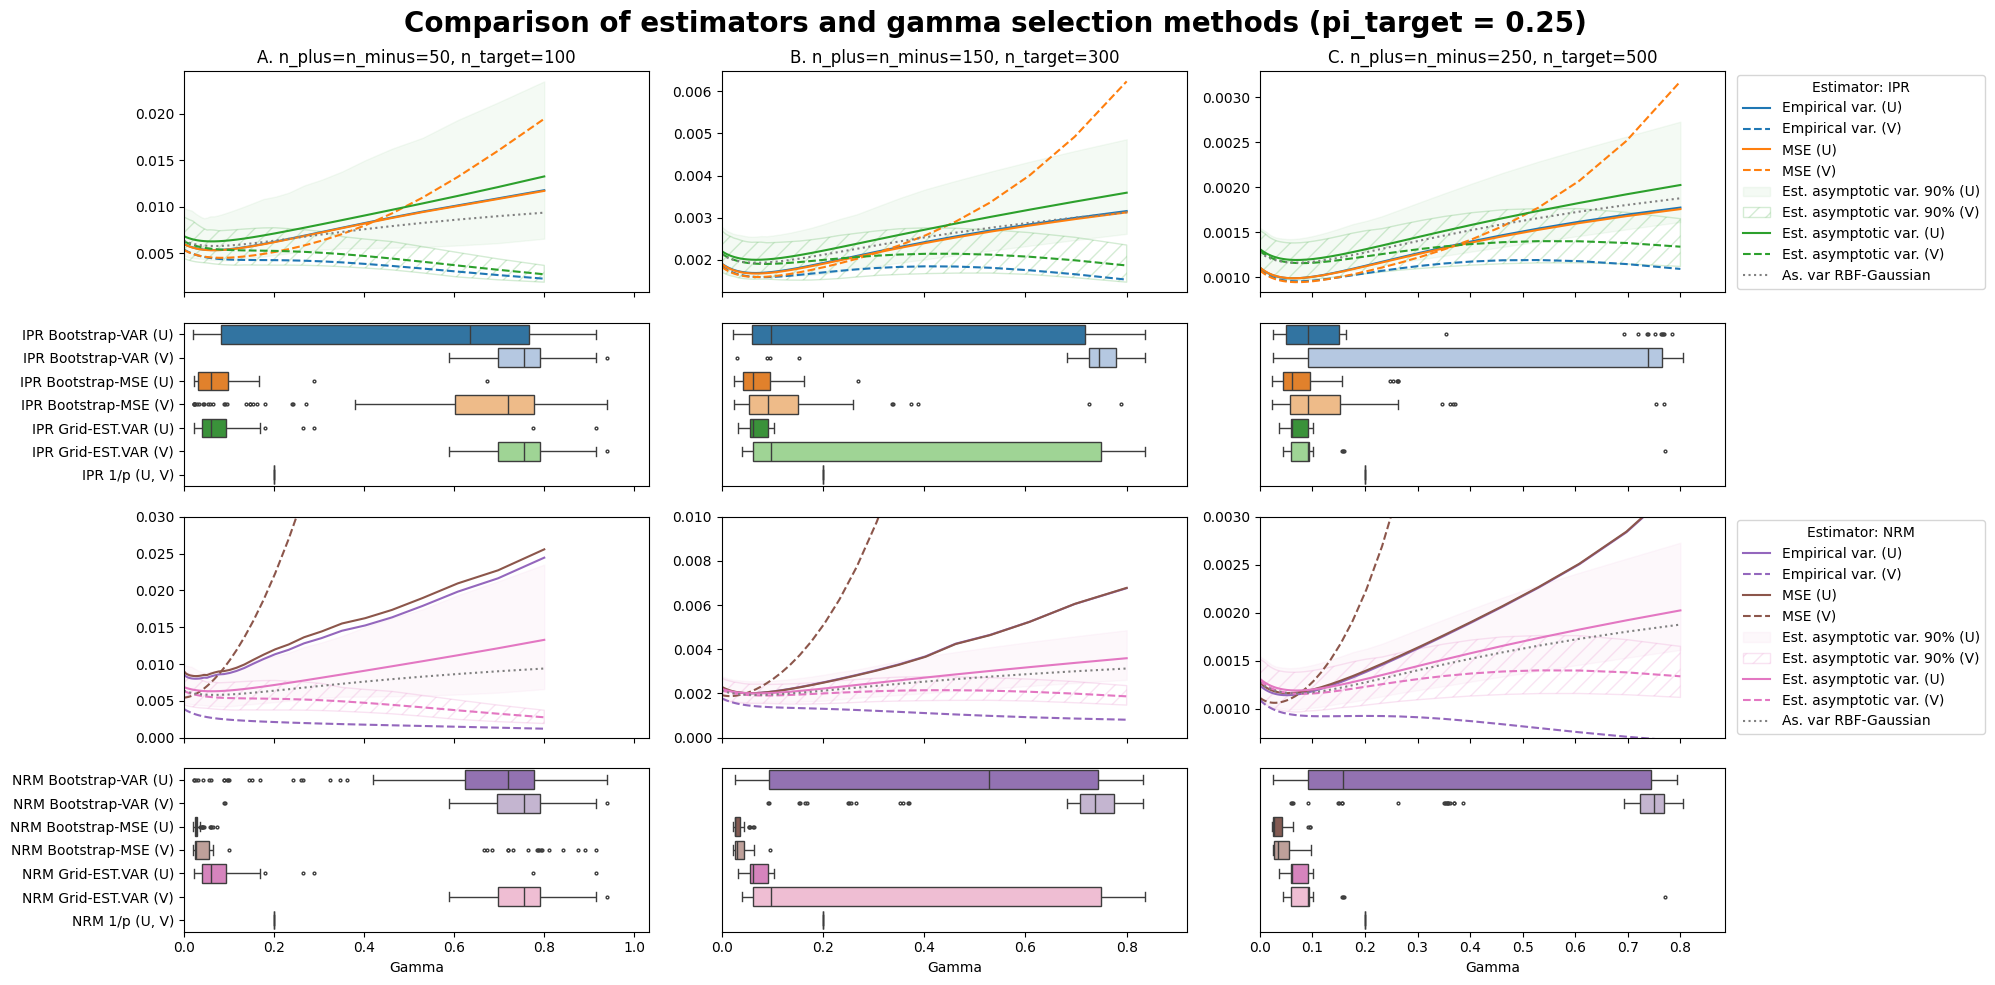

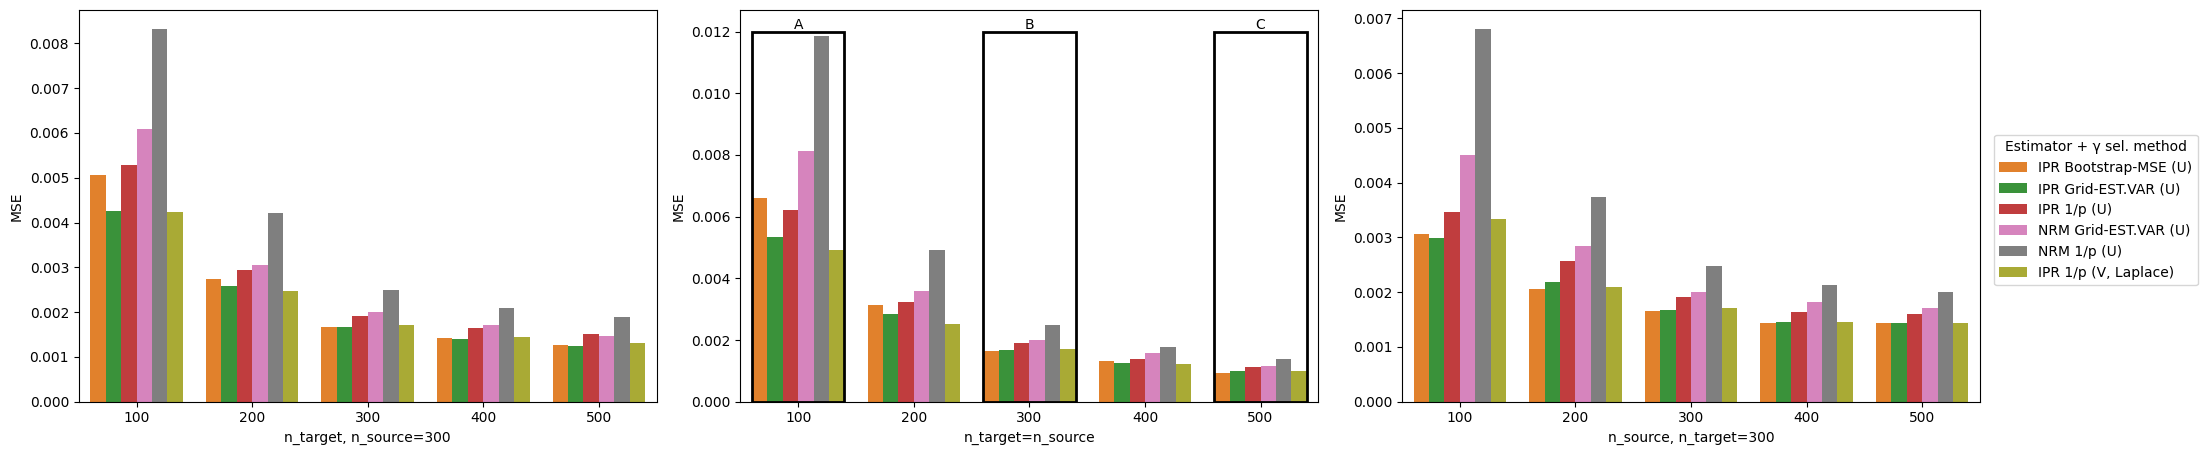

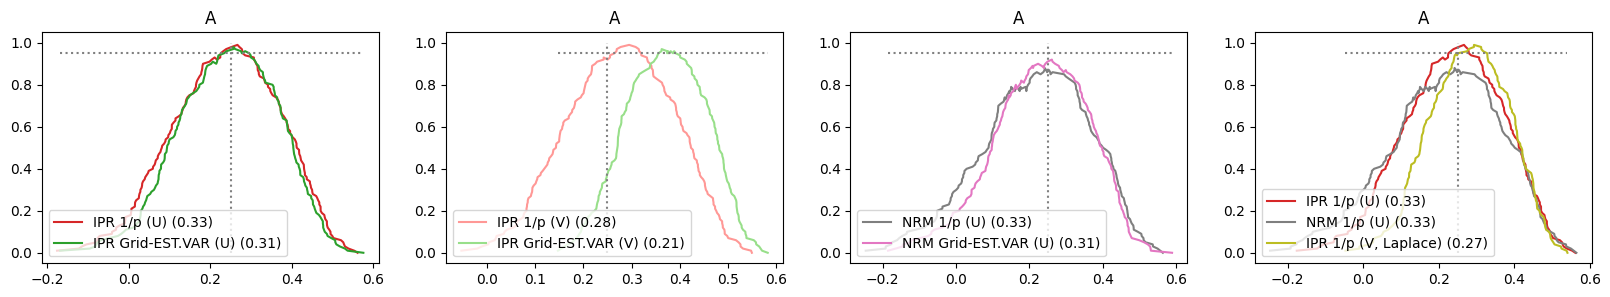

In [410]:
plot_scores_and_boxplots_n(df_estimators_sim_list, df_gamma_selection_list,
                         pi_target=0.25, kernel='rbf',
                         y_lim_list=[[[None, None],[None, None],[None, None]], 
                                     [[0, 0.03],[0, 0.01],[0.0007, 0.003]]])
plot_barplots_mse_n(df, 0.25)
fig, axes = plt.subplots(ncols=4, figsize=(20, 3))
plot_ci_curve(axes[0], df_all, ['ipr', 'ipr'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid', 'bootstrap_mse'], ['U', 'U', 'U'],
              0.25, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[1], df_all, ['ipr', 'ipr'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid', 'bootstrap_var'], ['V', 'V', 'V'],
              0.25, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[2], df_all, ['nrm', 'nrm'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid'], ['U', 'U', 'U'],
              0.25, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[3], df_all, ['ipr', 'nrm', 'ipr'], ['rbf', 'rbf', 'laplacian'], ['one_over_p', 'one_over_p', 'one_over_p'], ['U', 'U', 'V'],
              0.25, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')

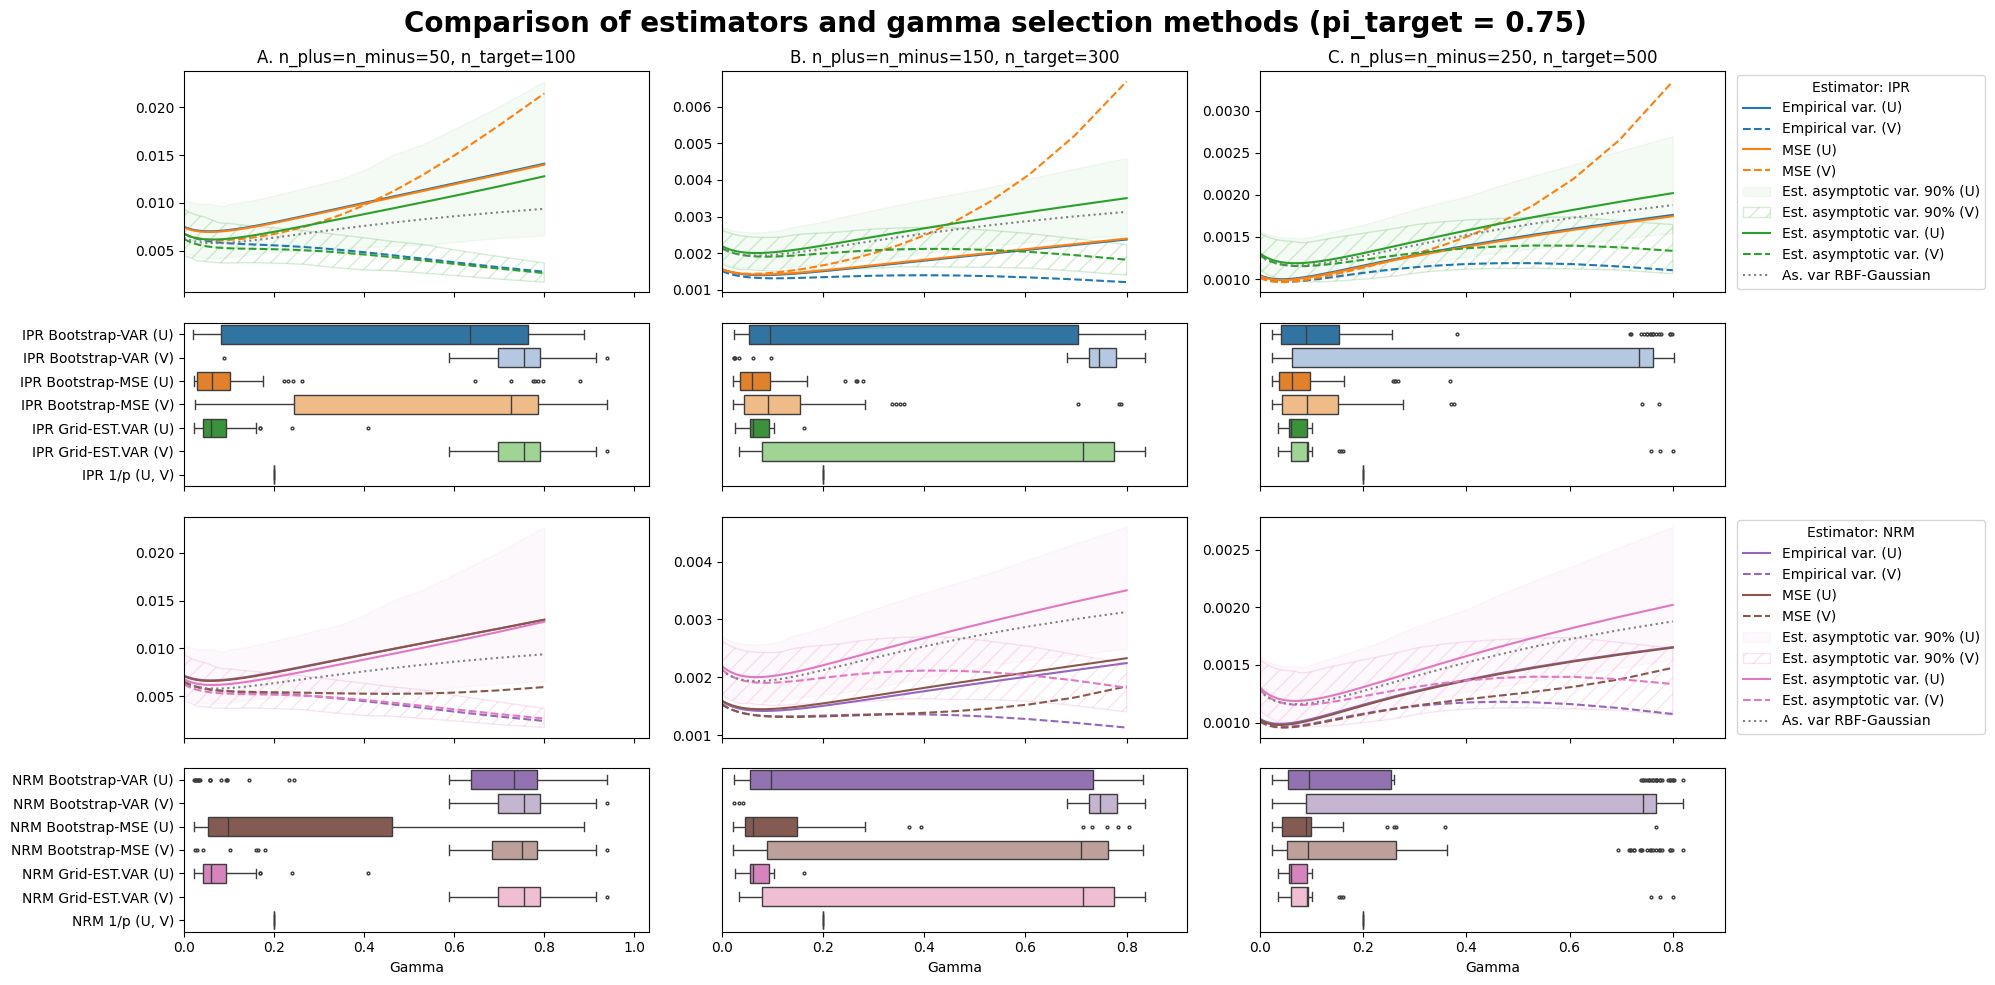

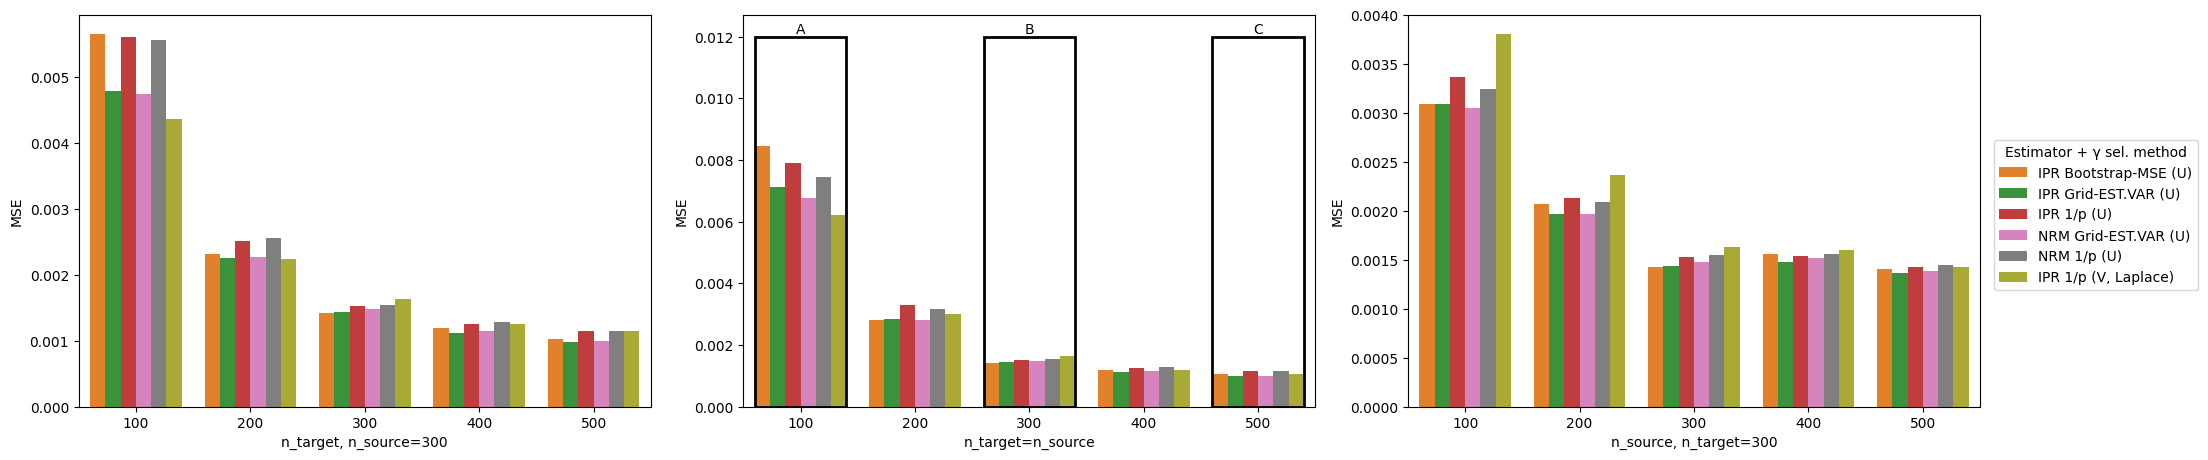

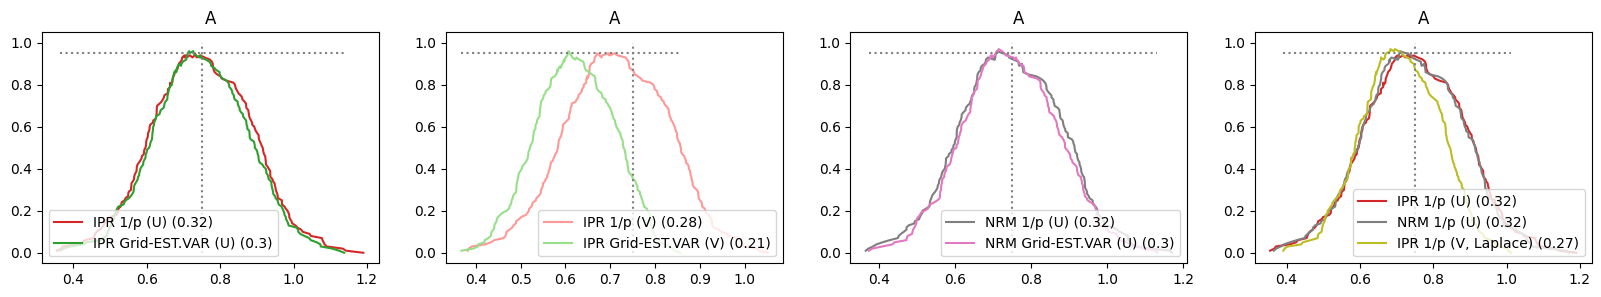

In [412]:
plot_scores_and_boxplots_n(df_estimators_sim_list, df_gamma_selection_list,
                         pi_target=0.75, kernel='rbf',
                         y_lim_list=[[[None, None],[None, None],[None, None]], 
                                     [[None, None],[None, None],[None, None]]])
plot_barplots_mse_n(df, 0.75)
fig, axes = plt.subplots(ncols=4, figsize=(20, 3))
plot_ci_curve(axes[0], df_all, ['ipr', 'ipr'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid', 'bootstrap_mse'], ['U', 'U', 'U'],
              0.75, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[1], df_all, ['ipr', 'ipr'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid', 'bootstrap_var'], ['V', 'V', 'V'],
              0.75, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[2], df_all, ['nrm', 'nrm'], ['rbf', 'rbf', 'rbf'], ['one_over_p', 'grid'], ['U', 'U', 'U'],
              0.75, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')
plot_ci_curve(axes[3], df_all, ['ipr', 'nrm', 'ipr'], ['rbf', 'rbf', 'laplacian'], ['one_over_p', 'one_over_p', 'one_over_p'], ['U', 'U', 'V'],
              0.75, 'sim_par_4', 50, 100, 5, 'Gaussian', 'A')